In [13]:
import pandas as pd

# 식품 섭취 데이터는 사용하지 않는 것으로 결정(2018-11-15)
df_ALL = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
# df_ffq = pd.read_sas("./hn16_ffq.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')

df_ALL.shape

(8150, 768)

In [49]:
# 만 19~79세 제한
df_data = df_ALL.loc[(18 < df_ALL.age), :]
df_data = df_data.loc[(80 > df_data.age), :]
df_data.shape

(6101, 768)

In [50]:
# 혈압치료중인 대상 제외
df_data = df_data.loc[(1 < df_data.DI1_pt) | (df_data.DI1_pt < 1), :]
df_data.shape

(4603, 768)

In [51]:
# 모든 값이 NaN값이 컬럼 삭제
df_data = df_data.dropna(axis=1, how='all')
df_data.shape

(4603, 714)

In [52]:
# 고혈압 유병여부 NaN값 대상 삭제
df_data = df_data.dropna(subset=['HE_HP'])
df_data.shape

(4585, 714)

In [53]:
df_data["HE_MAP"] = df_data["HE_dbp"] + (df_data["HE_sbp"] - df_data["HE_dbp"]) / 3
df_data.shape

(4585, 715)

In [54]:
df_data_sex_1 = df_data.loc[(1 == df_data.sex), :]
df_data_sex_1.shape

(1945, 715)

In [55]:
df_data_sex_2 = df_data.loc[(2 == df_data.sex), :]
df_data_sex_2.shape

(2640, 715)

In [9]:
print("HE_HP :\n")
print(pd.value_counts(df_data.HE_HP.values, sort=False).sort_index()) # 고혈압 유병 여부

HE_HP :

1.0    1358
2.0     530
3.0     227
dtype: int64


In [3]:
df_data.to_csv("df_data_30to49.csv")

In [4]:
print(pd.value_counts(df_data.region.values, sort=False).sort_index())

1.0     436
2.0     108
3.0      97
4.0     116
5.0      61
6.0      78
7.0      39
8.0      51
9.0     545
10.0     63
11.0     66
12.0     87
13.0     70
14.0     66
15.0     83
16.0     96
17.0     53
dtype: int64


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결
plt.rcParams["font.family"] = 'AppleGothic' # Mac
# plt.rcParams["font.family"] = 'Malgun Gothic' # Windows

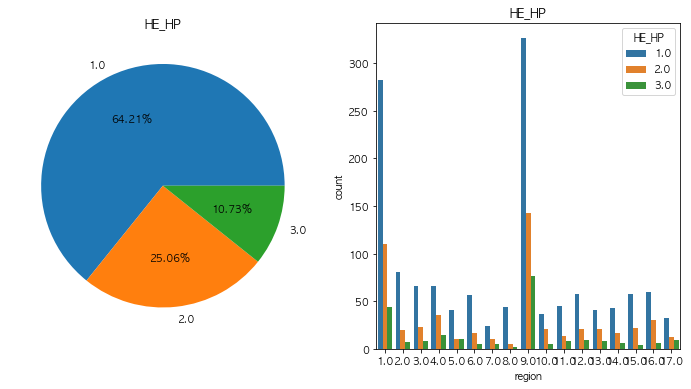

In [8]:
col = 'HE_HP'
col_name = "HE_HP"
bins = "region" 

f,ax=plt.subplots(1,2,figsize=(12,6))

df_data[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(bins, hue=col, data=df_data, ax=ax[1])
ax[1].set_title(col)
plt.show()

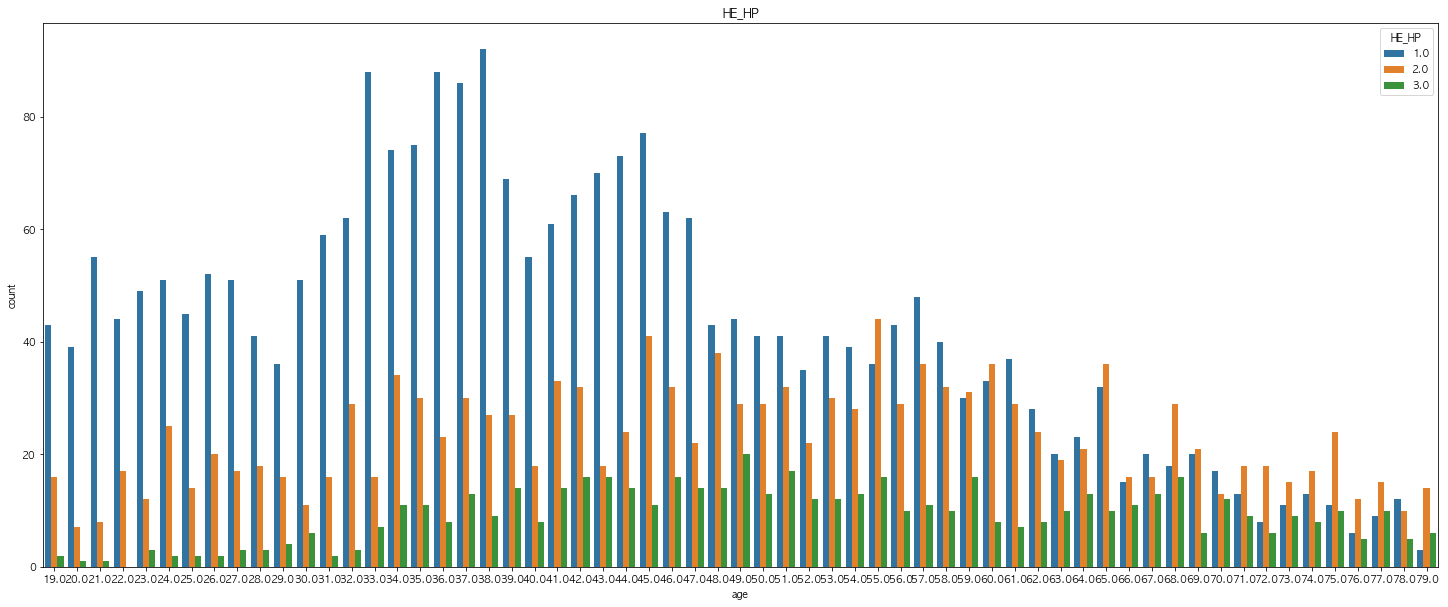

In [20]:
col = 'HE_HP'
col_name = "HE_HP"
bins = "age"

f,ax=plt.subplots(1,1,figsize=(25,10))

sns.countplot(bins, hue=col, data=df_data)
ax.set_title(col_name)
plt.show()

In [56]:
col = 'HE_MAP'
col_name = "HE_MAP"
bins = "age"

f,ax=plt.subplots(1,1,figsize=(25,10))

sns.countplot(bins, hue=col, data=df_data)
ax.set_title(col_name)
plt.show()

KeyboardInterrupt: 

In [48]:
print(pd.value_counts(df_data.HE_MAP.values, sort=False).sort_index())

55.000000      1
56.333333      1
58.333333      1
59.666667      1
60.333333      1
60.666667      1
63.000000      3
63.666667      1
64.000000      1
64.333333      2
65.333333      1
65.666667      3
66.000000      5
66.333333      3
66.666667      3
67.000000      6
67.333333      3
67.666667      6
68.000000      3
68.333333      8
68.666667      8
69.000000     10
69.333333     14
69.666667      3
70.000000      9
70.333333      8
70.666667     11
71.000000     14
71.333333     14
71.666667     13
              ..
119.000000     2
119.333333     1
119.333333     1
119.666667     1
120.000000     3
120.333333     2
120.666667     1
121.000000     1
121.333333     3
121.333333     1
121.666667     2
122.000000     2
122.333333     2
122.666667     1
123.000000     1
123.333333     1
124.666667     1
125.333333     1
126.000000     3
126.333333     2
126.666667     2
130.000000     1
131.333333     1
131.666667     1
133.000000     1
133.333333     1
134.666667     1
135.666667    